In [17]:
from sklearn import datasets, model_selection, neighbors, metrics, cluster 
import matplotlib.pyplot as plt 
from collections import Counter

# Data import and split 

In [18]:
data = datasets.load_digits()

In [19]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

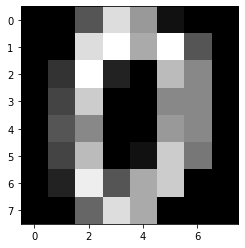

In [20]:
test = data.data[0].reshape(8,8)
plt.imshow(test, cmap = 'gray')

In [21]:
X = data.data
y = data.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3)
X_train.shape

(1257, 64)

# k-NN classifier

In [22]:
clf = neighbors.KNeighborsClassifier(algorithm = 'brute', n_neighbors = 5).fit(X_train, y_train)
y_pred = clf.predict(X_test)
dists, n_neighbors = clf.kneighbors(X_test)
print(metrics.classification_report(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.98      1.00      0.99        54
           2       1.00      1.00      1.00        59
           3       1.00      0.95      0.97        56
           4       1.00      1.00      1.00        62
           5       0.98      1.00      0.99        55
           6       1.00      1.00      1.00        47
           7       0.96      1.00      0.98        52
           8       0.96      0.98      0.97        55
           9       1.00      0.96      0.98        53

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

[[47  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  0 59  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  1  0  2  0  0]
 [ 0  0  0  0 62  0  0  0  0  0]
 [ 0  0  0  0  0 55  0  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0

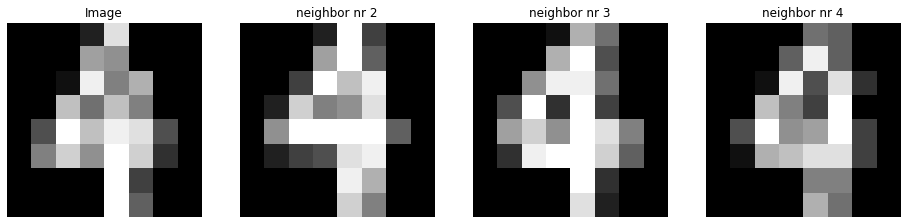

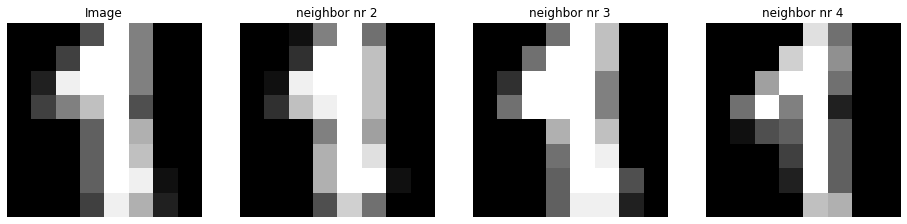

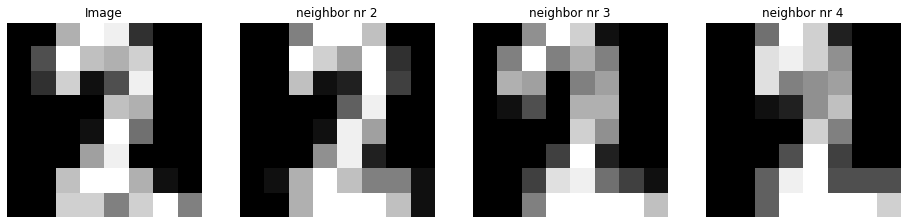

In [23]:
for i in range(1,4): 
    _, nearest = clf.kneighbors(X_test[i].reshape(1,-1))
    plt.figure(figsize = (16, 4))
    plt.subplot(1, 4, 1)
    plt.imshow(X_test[i].reshape(8,8), cmap = 'gray')
    plt.title('Image')
    plt.axis('off')
    for j in range(1,4):
        plt.subplot(1,4, j + 1)
        plt.imshow(X_train[nearest[0, j]].reshape(8,8), cmap = 'gray')
        plt.title('neighbor nr {}'.format(j+1))
        plt.axis('off')
    plt.show()
    

# k Means

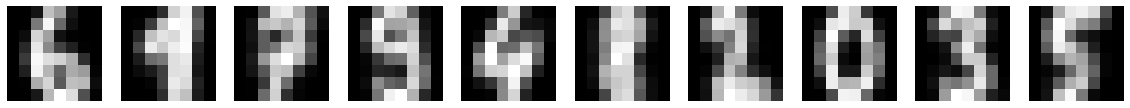

In [24]:
kmeans = cluster.KMeans(n_clusters = 10).fit(X_train)
centers = kmeans.cluster_centers_
plt.figure(figsize = (20, 10))
for i, center in enumerate(centers):
    plt.subplot(1, 10, i+1)
    plt.imshow(center.reshape(8,8), cmap = 'gray')
    plt.axis('off')
plt.show()

In [25]:
y_pred = kmeans.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.65      0.28      0.39        54
           2       0.02      0.02      0.02        59
           3       0.03      0.04      0.03        56
           4       0.98      0.94      0.96        62
           5       0.00      0.00      0.00        55
           6       0.00      0.00      0.00        47
           7       0.00      0.00      0.00        52
           8       0.02      0.02      0.02        55
           9       0.05      0.04      0.04        53

    accuracy                           0.15       540
   macro avg       0.17      0.13      0.15       540
weighted avg       0.19      0.15      0.16       540

[[ 0  0  0  0  0  0  0 47  0  0]
 [ 0 15  0  0  0 33  6  0  0  0]
 [ 0  1  1  0  0  3 50  0  4  0]
 [ 0  0  5  2  0  2  1  0 45  1]
 [ 0  0  3  0 58  1  0  0  0  0]
 [ 0  0  0 19  1  0  0  0  0 35]
 [46  0  0  0  0  0  0  1  0  0]
 [ 0  1 50

In [26]:
print(metrics.completeness_score(y_test, y_pred)) 
print(metrics.homogeneity_score(y_test, y_pred))
print(metrics.adjusted_mutual_info_score(y_test, y_pred))

0.765269283285789
0.7509713859927412
0.7493151062330898


In [27]:
y_pred_new = kmeans.predict(X_train)
print(metrics.completeness_score(y_train, y_pred_new)) 
print(metrics.homogeneity_score(y_train, y_pred_new))
print(metrics.adjusted_mutual_info_score(y_train, y_pred_new))

0.7402495295996144
0.7323814213346636
0.7324587739857353


## Get 'correct' class labels from training set 

In [28]:
cluster_label_dict = {i: [] for i in range(0,10)}
for i, image in enumerate(X_train): 
    pred = kmeans.predict(image.reshape(1,-1))[0]
    cluster_label_dict[pred]  += [y_train[i]]
for cluster in cluster_label_dict: 
    cluster_label_dict[cluster] = Counter(cluster_label_dict[cluster]).most_common(1)[0]
y_pred = [cluster_label_dict[pred][0] for pred in y_pred]

In [29]:
print(metrics.classification_report(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       0.48      0.89      0.62        54
           2       0.88      0.85      0.86        59
           3       0.90      0.80      0.85        56
           4       0.98      0.94      0.96        62
           5       0.90      0.64      0.74        55
           6       1.00      0.98      0.99        47
           7       0.81      0.96      0.88        52
           8       0.00      0.00      0.00        55
           9       0.54      0.79      0.64        53

    accuracy                           0.78       540
   macro avg       0.75      0.78      0.75       540
weighted avg       0.74      0.78      0.75       540

[[47  0  0  0  0  0  0  0  0  0]
 [ 0 48  6  0  0  0  0  0  0  0]
 [ 0  4 50  4  0  0  0  1  0  0]
 [ 0  2  1 45  0  1  0  5  0  2]
 [ 0  1  0  0 58  0  0  3  0  0]
 [ 0  0  0  0  1 35  0  0  0 19]
 [ 1  0  0  0  0  0 46  0  0  0]
 [ 0  2  0

/Users/rasmushelander/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
cluster_label_dict.values()

dict_values([6, 5, 3, 2, 1, 7, 4, 1, 0, 9])